In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from google.colab import files
data=files.upload()

Saving ETH-USDD.csv to ETH-USDD.csv


In [2]:
data = pd.read_csv("ETH-USDD.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
1,2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2,2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
3,2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
4,2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824
...,...,...,...,...,...,...,...
1973,2023-05-28,1831.098633,1915.723267,1825.467285,1910.914185,1910.914185,6359610561
1974,2023-05-29,1909.297485,1926.421753,1879.077515,1893.078125,1893.078125,5884674572
1975,2023-05-30,1893.093140,1916.574951,1883.934692,1901.026611,1901.026611,5363439784
1976,2023-05-31,1901.098267,1907.035400,1852.094727,1874.130493,1874.130493,5984512548


In [3]:
# 2. Chia train test validate theo tỉ lệ 7:2:1
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [6]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2579.62208833 2581.03991351 2582.45773869 2583.87556387 2585.29338906
 2586.71121424 2588.12903942 2589.5468646  2590.96468978 2592.38251497
 2593.80034015 2595.21816533 2596.63599051 2598.05381569 2599.47164088
 2600.88946606 2602.30729124 2603.72511642 2605.1429416  2606.56076678
 2607.97859197 2609.39641715 2610.81424233 2612.23206751 2613.64989269
 2615.06771788 2616.48554306 2617.90336824 2619.32119342 2620.7390186 ]


In [7]:
# 7. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 866.8182271925568
Testing RMSE: 1332.481054863514


In [10]:
# Đánh giá độ chính xác thuật toán bằng MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 844.9243930547505
Testing MAE: 1115.2151039406763


In [11]:
# Đánh giá độ chính xác thuật toán bằng MAPE
valid_mape = np.mean(np.abs((y_pred_val - y_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 56.84713692856852
Testing MAPE: 45.17399763502698


Validation RMSE: 866.8182271925568
Testing RMSE: 1332.481054863514


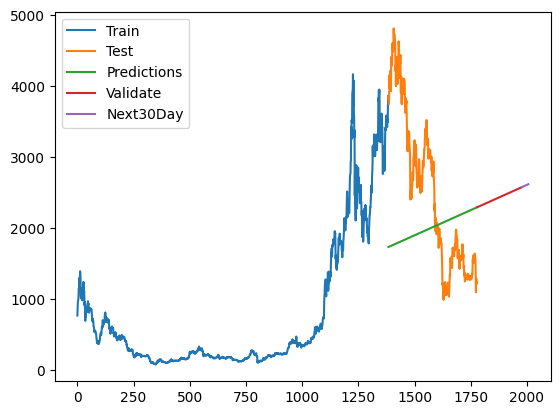

In [8]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [9]:
test_data.index

RangeIndex(start=1384, stop=1779, step=1)